### Seaborn
= Matplotlib + Statsmodels + $\alpha$

- distplot - rug, kde
- countplot

In [1]:
%matplotlib inline
sns.set() # sns 선언

`sns.set_style` : 

In [2]:
def sinplot():
    x = np.linspace(0, 10, 101) # 0-10 101 등분
    for i in range(3):
        plt.plot(x, np.sin(i + x)) # 60도씩 sin이 이동된 데이터를 그려줌

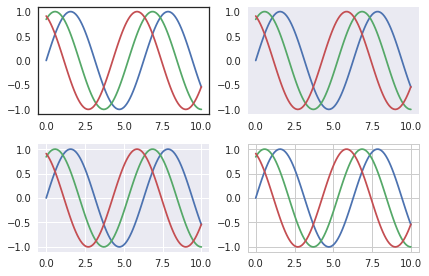

In [3]:
sns.set_style('white')
plt.subplot(221)
sinplot()

sns.set_style('dark')
plt.subplot(222)
sinplot()

sns.set_style('darkgrid')
plt.subplot(223)
sinplot()

sns.set_style('whitegrid')
plt.subplot(224)
sinplot()

plt.tight_layout()
plt.show()

sns.set_color_codes() : 기본색상을 가리키는 문자열을 바꿈
http://seaborn.pydata.org/generated/seaborn.set_color_codes.html

sns.set_palette() : 색 팔레트를 바꿈

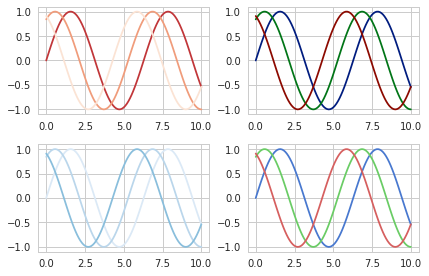

In [4]:
sns.set_palette('RdBu')
plt.subplot(221)
sinplot()

sns.set_palette('dark')
plt.subplot(222)
sinplot()

sns.set_palette('Blues')
plt.subplot(223)
sinplot()

sns.set_palette('muted')
plt.subplot(224)
sinplot()

plt.tight_layout()
plt.show()

`sns.set_context` : 선의 굵기

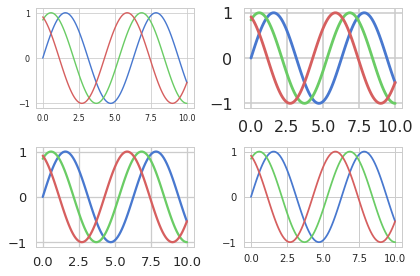

In [5]:
sns.set_context('paper')
plt.subplot(221)
sinplot()

sns.set_context('poster')
plt.subplot(222)
sinplot()

sns.set_context('talk')
plt.subplot(223)
sinplot()

sns.set_context('notebook') # default
plt.subplot(224)
sinplot()

plt.tight_layout()
plt.show()

In [6]:
# 샘플 데이터 로드
iris = sns.load_dataset("iris")    # 붓꽃 데이터
titanic = sns.load_dataset("titanic")    # 타이타닉호 데이터
tips = sns.load_dataset("tips")    # 팁 데이터
flights = sns.load_dataset("flights")    # 여객운송 데이터

### rugplot

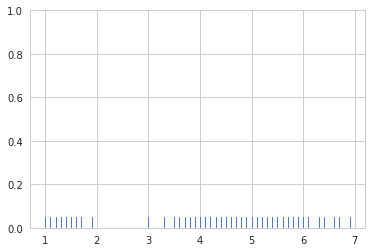

In [7]:
x = iris.petal_length.values

sns.rugplot(x)
plt.show()

### kdeplot

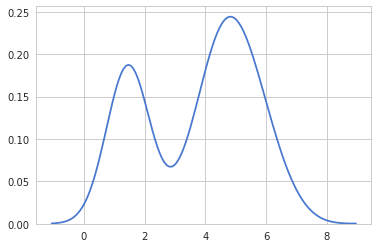

In [8]:
sns.kdeplot(x)
plt.show()

### distplot = kde + rug

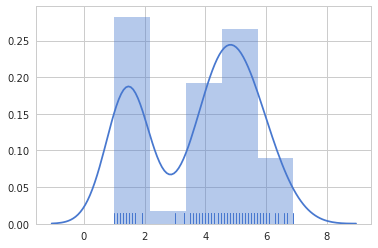

In [9]:
sns.distplot(x, kde=True, rug=True)
plt.show()

### countplot
각 카테고리 값 별로 데이터 수 표시 가능
- 데이터프레임에만 사용이 가능하다

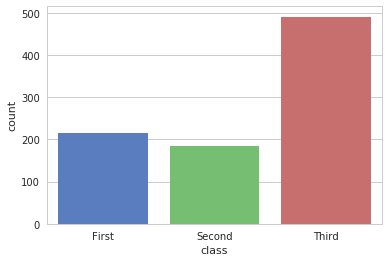

In [10]:
sns.countplot(x="class", data=titanic) #  x = column, data = DF
plt.show()

In [11]:
titanic.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


## 다차원 데이터

### scatter plot - jointplot
데이터가 2차원 + 연속적 실수값일 경우 사용
- 데이터 프레임에만 사용가능

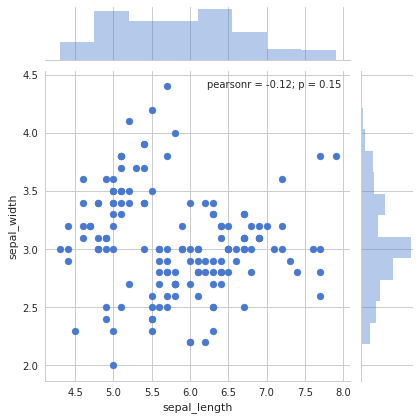

In [12]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris)
plt.show()

`kind = 'kde'` : 커널 밀도 히스토그램을 그린다.
- `kind` 의 default 값은 `'scatter'`

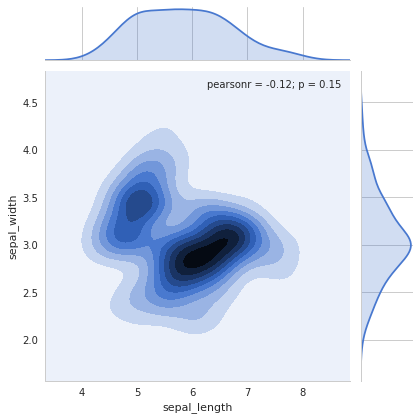

In [13]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, kind='kde')
plt.show()

## 다차원 실수형 데이터

### pairplot
3차원 이상의 데이터라면 `pairplot` 명령을 이용
- 카테고리형 데이터가 섞인 경우, `hue` 인수에 카테고리 변수 이름을 지정하여 카테고리 값에 따라 색상을 다르게 할 수 있다.

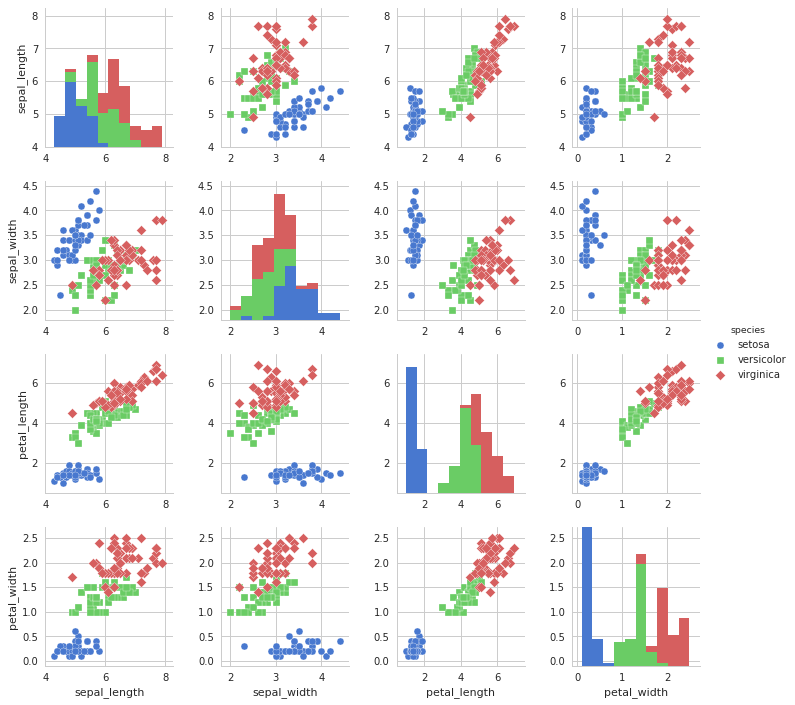

In [14]:
sns.pairplot(iris, hue="species", markers=["o", "s", "D"]) 
plt.show()

### lmplot

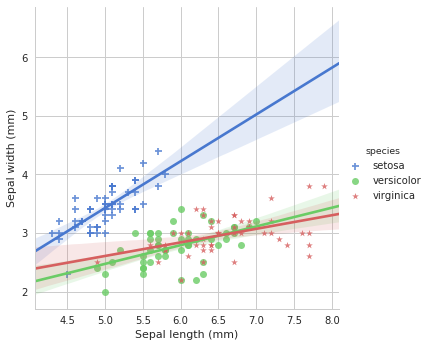

In [15]:
p = sns.lmplot(x="sepal_length", 
               y="sepal_width", 
               hue="species", 
               data=iris, markers=["+", "o", "*"])

p.set_axis_labels("Sepal length (mm)", "Sepal width (mm)")

plt.show()

### heatmap
데이터가 2차원이고 모든값이 카테고리 값일 경우

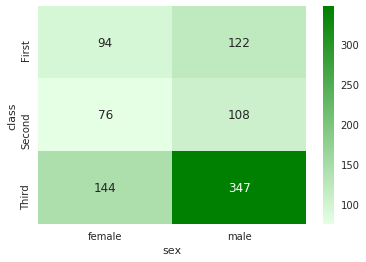

In [16]:
titanic_size = titanic.pivot_table(index="class", columns="sex", aggfunc="size")
sns.heatmap(titanic_size, #df
            cmap=sns.light_palette("green", as_cmap=True), #color map, as_cmap
            annot=True, # 값 표현 여부 
            fmt="d", # annot type : "d" 정수, ".2g" 소수둘째버림, ".2f"소수둘째자리
           )
plt.show()

데이터가 2차원이고, 카테고리 값이 섞여 있다면, 다음 분포 플롯 이용 가능
-  barplot
- boxplot
- pointplot
- violinplot
- stripplot
- swarmplot